<a href="https://colab.research.google.com/github/akilanvj/Machine-Learning/blob/main/E8122009_proj_code_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. 

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import to_categorical

In [2]:
# Load the MNIST dataset and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Define the architecture of the MLP
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [4]:
# Compile the model and define the loss function and optimizer 
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy']) 

In [5]:
# Train the MLP
history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 13s 25ms/step - loss: 0.2445 - accuracy: 0.9243 - val_loss: 0.1073 - val_accuracy: 0.9664
Epoch 2/20
469/469 [==============================] - 11s 23ms/step - loss: 0.1034 - accuracy: 0.9684 - val_loss: 0.0777 - val_accuracy: 0.9759
Epoch 3/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0743 - accuracy: 0.9771 - val_loss: 0.0827 - val_accuracy: 0.9774
Epoch 4/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0600 - accuracy: 0.9817 - val_loss: 0.0716 - val_accuracy: 0.9808
Epoch 5/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0517 - accuracy: 0.9841 - val_loss: 0.0719 - val_accuracy: 0.9817
Epoch 6/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0427 - accuracy: 0.9870 - val_loss: 0.0943 - val_accuracy: 0.9766
Epoch 7/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0388 - accuracy: 0.9886 - val_loss: 0.0890 - val_accuracy:

In [6]:
# Evaluate the MLP
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12678919732570648
Test accuracy: 0.9842000007629395


# 3.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [8]:
#load the CIFAR-10 dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [9]:
#normalize pixel values to be between 0 and 1
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

#convert the labels to one dimension vector
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [10]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
#define the CNN architecture
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

In [12]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [13]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=128,verbose=True)

Epoch 1/5
391/391 [==============================] - 308s 783ms/step - loss: 0.2692 - accuracy: 0.3466 - val_loss: 0.2127 - val_accuracy: 0.5155
Epoch 2/5
391/391 [==============================] - 290s 742ms/step - loss: 0.2018 - accuracy: 0.5461 - val_loss: 0.1720 - val_accuracy: 0.6221
Epoch 3/5
391/391 [==============================] - 289s 738ms/step - loss: 0.1757 - accuracy: 0.6177 - val_loss: 0.1563 - val_accuracy: 0.6585
Epoch 4/5
391/391 [==============================] - 286s 731ms/step - loss: 0.1580 - accuracy: 0.6637 - val_loss: 0.1401 - val_accuracy: 0.7024
Epoch 5/5
391/391 [==============================] - 296s 756ms/step - loss: 0.1456 - accuracy: 0.6948 - val_loss: 0.1311 - val_accuracy: 0.7263


In [14]:
#final evaluation of the model
scores=model.evaluate(x_test,y_test,verbose=0)
print("Accuracy: %.2f%%"%(scores[1]*100))

Accuracy: 72.63%


# 4.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
dataset = pd.read_csv('/content/Salary_Data.csv.xls')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [18]:
#Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)

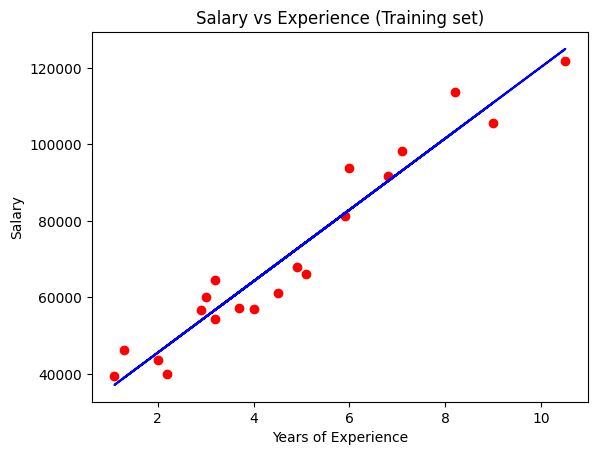

In [20]:
#Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

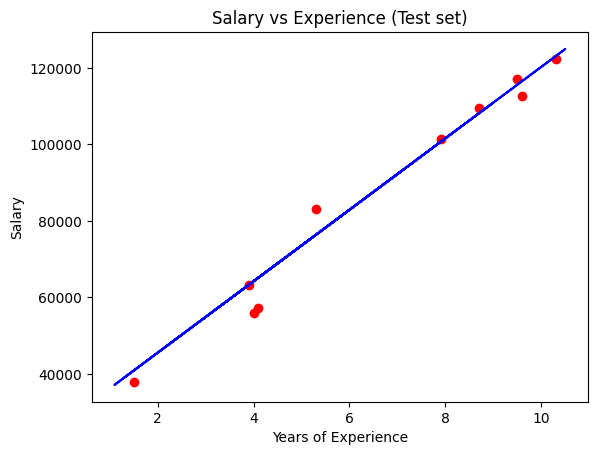

In [21]:
#Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# 5.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier  

In [23]:
# Load the dataset
df=pd.read_csv('/content/patient_data.csv')
df.head()

,Age,Gender,Ethnicity,BMI,Blood Pressure (systolic),Blood Pressure (diastolic),Heart Rate,Respiratory Rate,Oxygen Saturation Level,Chronic Conditions,Medications,Lab Test Results,Chief Complaint,Severity
0,45,Male,Caucasian,23,120,80,75,16,98,None,None,Normal,Chest Pain,Severe
1,30,Female,Hispanic,27,135,90,80,18,95,Hypertension,None,High Glucose,Headache,Moderate
2,65,Male,African,32,150,100,90,20,92,Diabetes,Insulin,Abnormal Sodium,Shortness of Breath,Severe
3,50,Female,Caucasian,29,140,95,70,14,96,None,Blood thinners,Normal,Chest Pain,Moderate
4,28,Male,Asian,25,115,75,80,16,97,None,None,Normal,Fever,Mild


In [24]:
# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Ethnicity'] = le.fit_transform(df['Ethnicity'])
df['Age'] = le.fit_transform(df['Age'])
df['Severity'] = le.fit_transform(df['Severity'])
df['Chronic Conditions'] = le.fit_transform(df['Chronic Conditions']) 
df['Medications'] = le.fit_transform(df['Medications'])
df['Oxygen Saturation Level'] = le.fit_transform(df['Oxygen Saturation Level'])

In [25]:
df['Severity'].value_counts(dropna=False)

2    8
1    7
0    7
Name: Severity, dtype: int64

In [26]:
# Split the dataset into training and testing sets
X = df.drop(['Severity','Lab Test Results','Chief Complaint'],axis=1)
y = df['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
#Logistic Regression
classifier = LogisticRegression(random_state=10)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [29]:
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.42857142857142855

In [30]:
#SUPPORT VECTOR MACHINE_SVM
from sklearn import svm
model = svm.SVC(kernel='poly')   #poly-->Kernel=degree =3
model.fit(X_train, y_train)
prediction=model.predict(X_test)

In [31]:
#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.60      1.00      0.75         3
           2       0.00      0.00      0.00         3

    accuracy                           0.57         7
   macro avg       0.37      0.67      0.47         7
weighted avg       0.33      0.57      0.42         7

[[1 0 0]
 [0 3 0]
 [1 2 0]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
#KNN
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, p=2 )  
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [34]:
#Predicting the test set result  
y_pred= classifier.predict(X_test) 
#Creating the Confusion matrix  
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.60      1.00      0.75         3
           2       0.00      0.00      0.00         3

    accuracy                           0.57         7
   macro avg       0.37      0.67      0.47         7
weighted avg       0.33      0.57      0.42         7

[[1 0 0]
 [0 3 0]
 [1 2 0]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 6.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [36]:
# Generate the make_moons dataset and split the data into training and testing sets 
X, y = make_moons(noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Train an SVM model on the training data
model = SVC(kernel='rbf', C=1.0, gamma=0.1)
model.fit(X_train, y_train)

SVC(gamma=0.1)

In [38]:
# Evaluate the SVM model on the testing data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


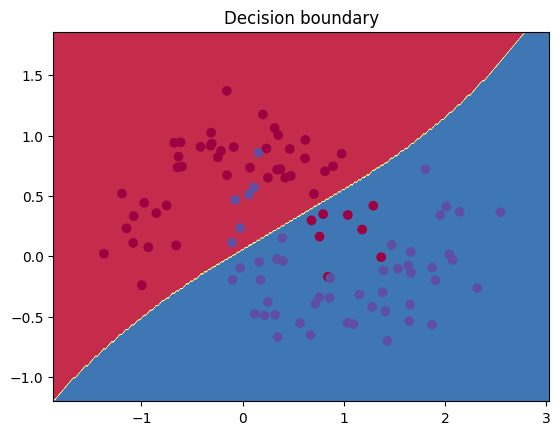

In [39]:
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02)) 
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral) 
plt.title('Decision boundary')
plt.show()

# 7.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
df = pd.read_csv('/content/diabetes.xls')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [41]:
df.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [42]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = svm.SVC(kernel='linear', C=1, random_state=42)

In [45]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



# 8.

In [47]:
# LSTM with Dropout for sequence classification in the IMDB dataset
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

In [48]:
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17464789/17464789 [==============================] - 0s 0us/step


In [49]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [50]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 dropout_5 (Dropout)         (None, 500, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
391/391 [========================

# 11.

In [51]:
# Import the necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [52]:
# Create a sample dataset with 500 samples and two features
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=0)

In [53]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
# Create the SVM and train the model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [54]:
# Evaluate the model
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8733333333333333


# 13.

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [56]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [57]:
X_train.shape

(60000, 28, 28)

In [58]:
X_test.shape

(10000, 28, 28)

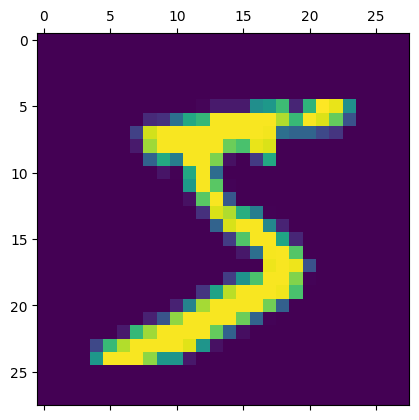

In [59]:
plt.matshow(X_train[0])

In [60]:
y_train[0]

5

In [61]:
X_train = X_train / 255
X_test = X_test / 255

In [62]:
#CNN
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [63]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1610 - accuracy: 0.9526
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0550 - accuracy: 0.9833
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0369 - accuracy: 0.9886
Epoch 4/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0244 - accuracy: 0.9924
Epoch 5/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0172 - accuracy: 0.9941


In [64]:
# Evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy: {acc}")

313/313 [==============================] - 3s 8ms/step - loss: 0.0407 - accuracy: 0.9867
Accuracy: 0.9866999983787537


In [65]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[2.3140965e-03, 5.1875480e-02, 7.6955467e-01, 5.5135494e-01,
        2.7283253e-03, 6.1211715e-05, 1.9667752e-08, 9.9999946e-01,
        5.8305120e-01, 5.1992792e-01],
       [1.3952719e-02, 9.7683191e-01, 9.9999988e-01, 2.3833181e-01,
        1.7726785e-04, 6.8119862e-06, 9.9454515e-02, 4.2485302e-05,
        7.6745075e-01, 5.1912101e-04],
       [3.3962750e-03, 9.9999428e-01, 4.3864056e-01, 4.9835053e-05,
        2.8395230e-01, 3.0819437e-04, 6.1531910e-03, 2.0618834e-01,
        5.7168823e-01, 6.6949625e-04],
       [9.9999845e-01, 3.9066471e-02, 3.9826795e-02, 4.4256882e-05,
        4.5067347e-03, 5.8858129e-03, 6.9989091e-01, 5.3181136e-01,
        1.6962750e-01, 3.6514636e-02],
       [1.2665495e-01, 8.4090121e-03, 2.0582067e-02, 3.9736736e-03,
        9.9997735e-01, 4.8518498e-04, 6.6073813e-02, 2.1047984e-01,
        7.0421416e-01, 9.3142611e-01]], dtype=float32)

In [66]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

In [67]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [68]:
#To visualize the images
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])   

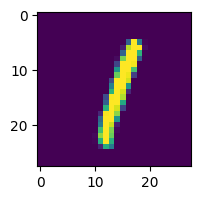

In [69]:
plot_sample(X_test, y_test,5)

In [70]:
y_classes[5]

1

# 14.

In [71]:
# Load the dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [72]:
# Load the dataset
df = pd.read_csv('/content/Housing - Housing.csv')
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [73]:
# Encode the categorical variables
labelencoder = LabelEncoder()
X[:, 5] = labelencoder.fit_transform(X[:, 5])
X[:, 6] = labelencoder.fit_transform(X[:, 6])
X[:, 7] = labelencoder.fit_transform(X[:, 7])
X[:, 8] = labelencoder.fit_transform(X[:, 8])
X[:, 9] = labelencoder.fit_transform(X[:, 9])
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()

In [74]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [75]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
# Train the model using SGD
model = SGDRegressor(max_iter=1000, eta0=0.01, alpha=0.0001, penalty='l2')
model.fit(X_train, y_train)

SGDRegressor()

In [77]:
# Evaluate the performance of the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred) 
print('MSE:', mse)

MSE: 1909699364619.6445
